<a href="https://colab.research.google.com/github/faarhaanfaarooq/Data-Analysis-Journey/blob/main/Project_3_(Netflix_Stock_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv("NFLX.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [4]:
sns.set(rc={'figure.figsize' : (10,5)})

### Setting Date as Index

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

### Volume Of Stock Traded

Text(0.5, 1.0, 'Volume of Stock Versus Time')

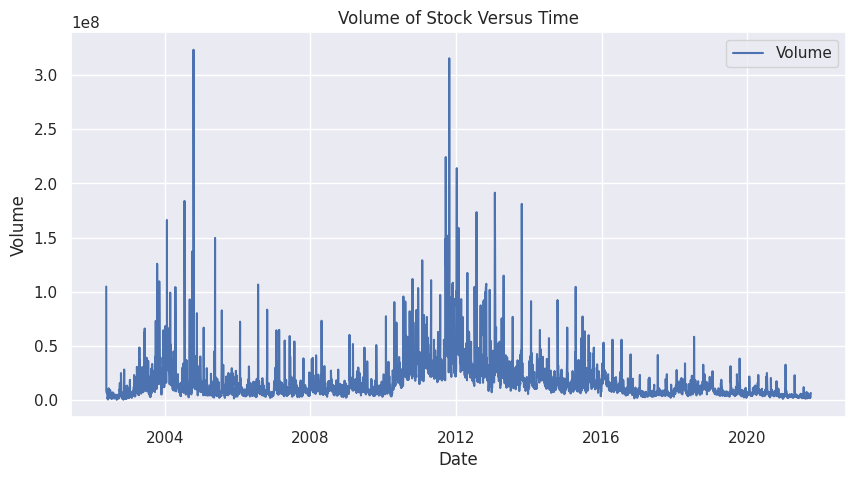

In [6]:
sns.lineplot(x = df.index, y = df['Volume'], label = 'Volume')
plt.title('Volume of Stock Versus Time')

### Netflix Stock Price

<Axes: title={'center': 'Netflix Stock price'}, xlabel='Date'>

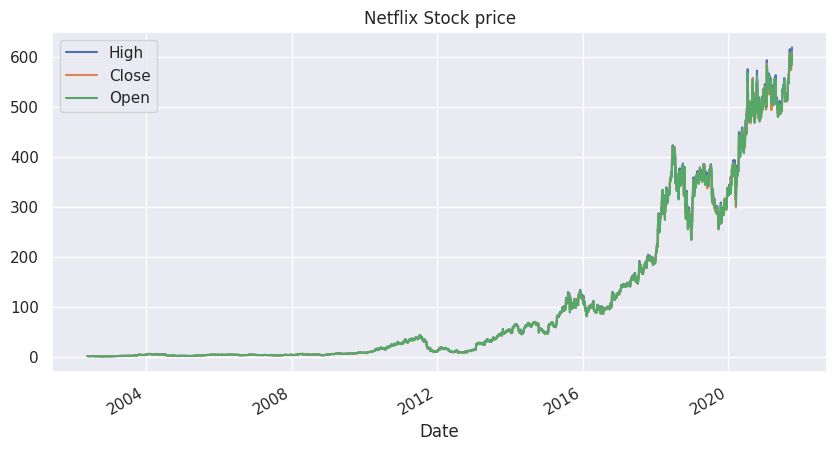

In [7]:
df.plot(y = ['High', 'Close', 'Open'], title = 'Netflix Stock price')

<Axes: xlabel='Year'>

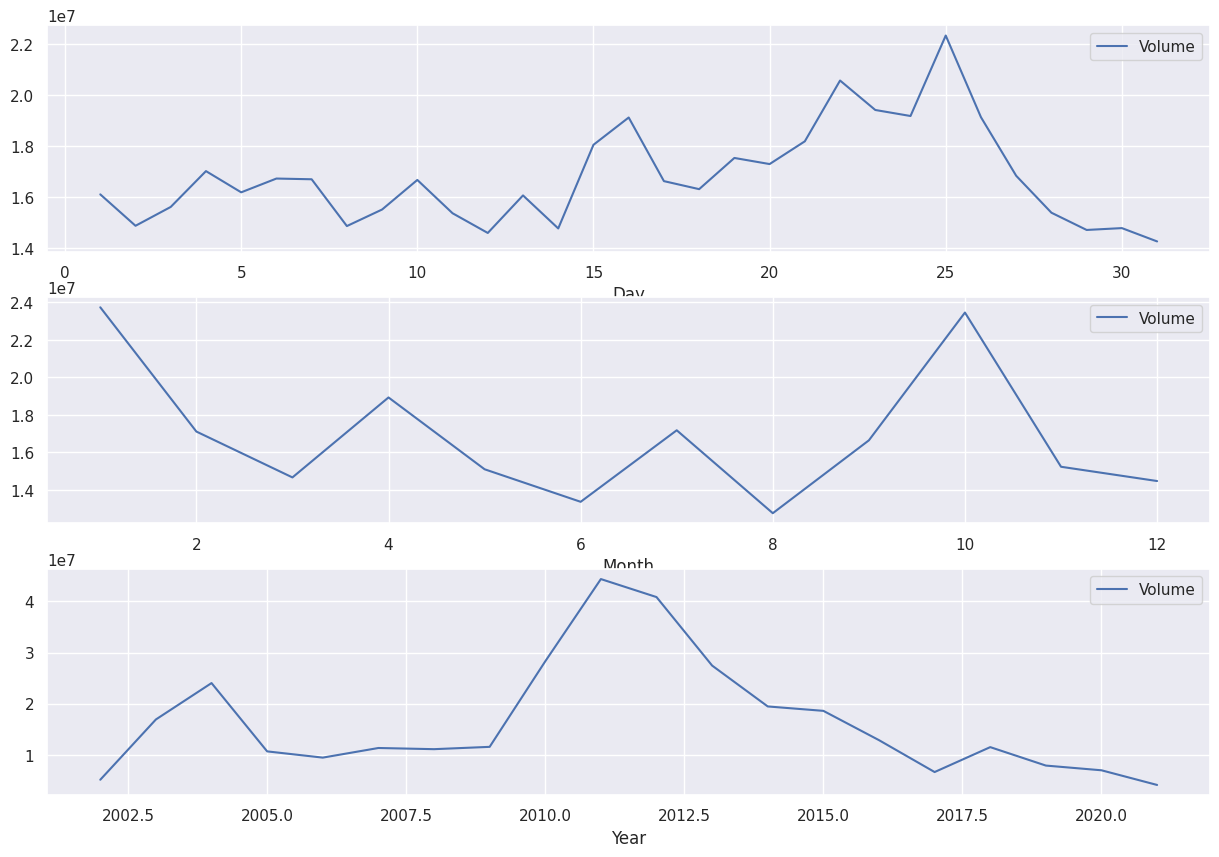

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (15,10))
df.groupby(df.index.day).mean().plot(y = 'Volume', ax = ax1, xlabel = 'Day')
df.groupby(df.index.month).mean().plot(y = 'Volume', ax = ax2, xlabel = 'Month')
df.groupby(df.index.year).mean().plot(y = 'Volume', ax = ax3, xlabel = 'Year')

### Top 5 dates with highest Stock Price

In [11]:
a = df.sort_values(by = 'High', ascending = False).head(5)
a['High']

Date
2021-09-30    619.000000
2021-09-08    615.599976
2021-09-07    613.849976
2021-09-29    609.880005
2021-09-10    609.450012
Name: High, dtype: float64

### Top 5 dates with lowest Stock Price

In [12]:
b = df.sort_values(by = 'Low', ascending = True).head(5)
b['Low']

Date
2002-10-10    0.346429
2002-10-09    0.347143
2002-10-07    0.382143
2002-10-08    0.390714
2002-10-16    0.442857
Name: Low, dtype: float64

<Axes: xlabel='Date', ylabel='Low'>

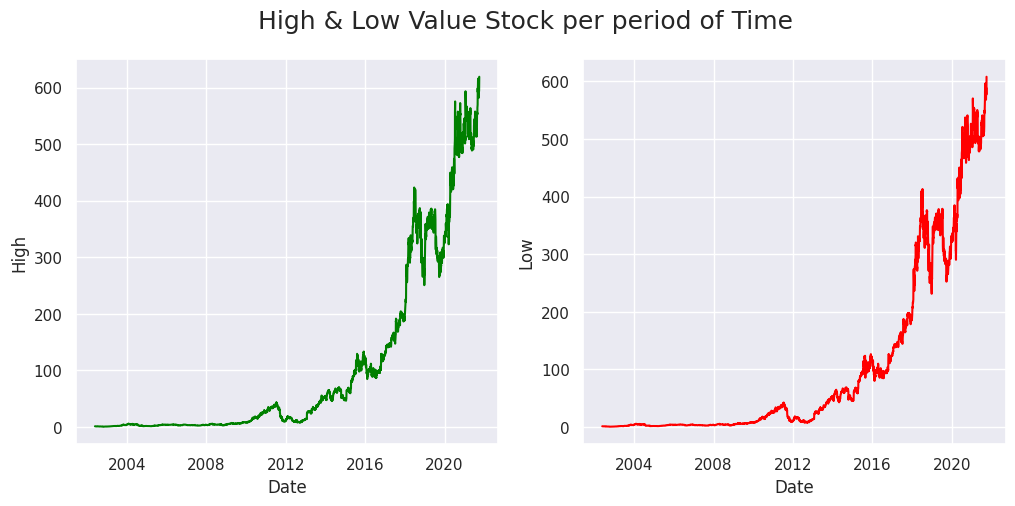

In [14]:
fig,axes = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12, 5))
fig.suptitle('High & Low Value Stock per period of Time', fontsize = 18)
sns.lineplot(ax = axes[0], y = df['High'], x = df.index, color = 'green')
sns.lineplot(ax = axes[1], y = df['Low'], x = df.index, color = 'red')